In [1]:
# Импорт библиотек
import numpy
import pandas as pd

In [2]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/USER/Documents/Python/_Python_part_2/Lecture_4_02/monthly car sales in Quebec")


In [4]:
# Импорт обучающей выборки
sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])


In [5]:
#  Знакомимся с данными
sales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [6]:
#  Знакомимся с данными
sales.shape

(108, 2)

In [7]:
#  Знакомимся с данными
sales.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


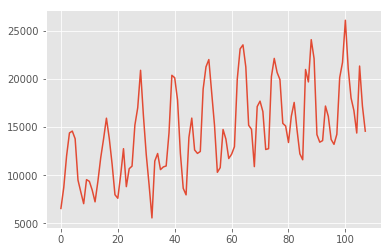

In [8]:
#  График, чтобы ответить на 4 вопроса
sales.iloc[:,1].plot()


In [9]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i)

sales_2['t'] = sales.iloc[:,1].values

print(sales_2.head(13))




      t-12    t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
0      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5      NaN     NaN      NaN      NaN      NaN      NaN      NaN   6550.0   
6      NaN     NaN      NaN      NaN      NaN      NaN   6550.0   8728.0   
7      NaN     NaN      NaN      NaN      NaN   6550.0   8728.0  12026.0   
8      NaN     NaN      NaN      NaN   6550.0   8728.0  12026.0  14395.0   
9      NaN     NaN      NaN   6550.0   8728.0  12026.0  14395.0  14587.0   
10     NaN     NaN   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   
11     NaN  6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0   
12  6550.0  

In [10]:
#  Отрезаем первые 12 строк
sales_4 = sales_2[12:]

sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


In [11]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [12]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [13]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(96, 13)
(91, 12)
(91,)
(5, 12)
(5,)


In [14]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9      t-8      t-7     t-6     t-5  \
12   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0  9498.0  8251.0   
13   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0  8251.0  7049.0   
14  12026.0  14395.0  14587.0  13791.0   9498.0   8251.0  7049.0  9545.0   
15  14395.0  14587.0  13791.0   9498.0   8251.0   7049.0  9545.0  9364.0   
16  14587.0  13791.0   9498.0   8251.0   7049.0   9545.0  9364.0  8456.0   

       t-4     t-3      t-2      t-1  
12  7049.0  9545.0   9364.0   8456.0  
13  9545.0  9364.0   8456.0   7237.0  
14  9364.0  8456.0   7237.0   9374.0  
15  8456.0  7237.0   9374.0  11837.0  
16  7237.0  9374.0  11837.0  13784.0  


In [15]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [16]:
from keras.models import Sequential
from keras.layers import Dense


C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
91/91 [==============================] - 0s 5ms/step - loss: 130157550.0659 - mean_absolute_percentage_error: 71.9792
Epoch 2/300
91/91 [==============================] - 0s 180us/step - loss: 112065531.1648 - mean_absolute_percentage_error: 65.6578
Epoch 3/300
91/91 [==============================] - 0s 175us/step - loss: 95398646.4176 - mean_absolute_percentage_error: 59.3682
Epoch 4/300
91/91 [==============================] - 0s 157us/step - loss: 81354130.5495 - mean_absolute_percentage_error: 53.2746
Epoch 5/300
91/91 [==============================] - 0s 173us/step - loss: 68115838.9890 - mean_absolute_percentage_error: 47.5388
Epoch 6/300
91/91 [==============================] - 0s 132us/step - loss: 57364547.0769 - mean_absolute_percentage_error: 42.6978
Epoch 7/300
91/91 [==============================] - 0s 115us/step - loss: 48104079.2527 - mean_absolute_percentage_error: 38.8092
Epoch 8/300
91/91 [==============================] - 0s 99us/step - loss: 41447998.

91/91 [==============================] - 0s 80us/step - loss: 4558362.0824 - mean_absolute_percentage_error: 12.5149
Epoch 126/300
91/91 [==============================] - 0s 97us/step - loss: 4526912.3297 - mean_absolute_percentage_error: 12.4628
Epoch 127/300
91/91 [==============================] - 0s 90us/step - loss: 4486285.9148 - mean_absolute_percentage_error: 12.3840
Epoch 128/300
91/91 [==============================] - 0s 96us/step - loss: 4447772.7692 - mean_absolute_percentage_error: 12.3217
Epoch 129/300
91/91 [==============================] - 0s 119us/step - loss: 4414877.7418 - mean_absolute_percentage_error: 12.2746
Epoch 130/300
91/91 [==============================] - 0s 80us/step - loss: 4380195.2692 - mean_absolute_percentage_error: 12.2206
Epoch 131/300
91/91 [==============================] - 0s 79us/step - loss: 4344064.1621 - mean_absolute_percentage_error: 12.1580
Epoch 132/300
91/91 [==============================] - 0s 89us/step - loss: 4311077.2308 - mean_

91/91 [==============================] - 0s 144us/step - loss: 2623655.9808 - mean_absolute_percentage_error: 8.9066
Epoch 250/300
91/91 [==============================] - 0s 99us/step - loss: 2613578.1497 - mean_absolute_percentage_error: 8.8431
Epoch 251/300
91/91 [==============================] - 0s 63us/step - loss: 2609915.8736 - mean_absolute_percentage_error: 8.8294
Epoch 252/300
91/91 [==============================] - 0s 95us/step - loss: 2606745.4780 - mean_absolute_percentage_error: 8.8228
Epoch 253/300
91/91 [==============================] - 0s 84us/step - loss: 2606226.5234 - mean_absolute_percentage_error: 8.8366
Epoch 254/300
91/91 [==============================] - 0s 81us/step - loss: 2600102.9973 - mean_absolute_percentage_error: 8.8388
Epoch 255/300
91/91 [==============================] - 0s 98us/step - loss: 2599545.6291 - mean_absolute_percentage_error: 8.8432
Epoch 256/300
91/91 [==============================] - 0s 85us/step - loss: 2596981.7363 - mean_absolut

In [18]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

5/5 [==============================] - 0s 21ms/step

MAPE: 8.33%


In [19]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [20]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [21]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 12)
(91,)
(5, 12)
(5,)


In [22]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


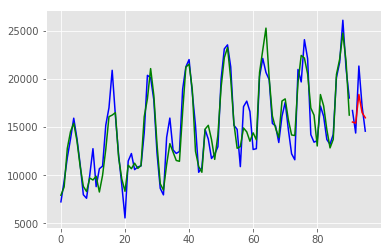

In [23]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶

x2 = numpy.arange(0, 91, 1)

x3 = numpy.arange(91, 96, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')

